# <center>Øving 1a</center>
Torbjørn Bakke

Learning rate = 0.000150, epochs = 300.000000
ŷ = xW+b = x0.131404-0.039644
loss = 5.023447


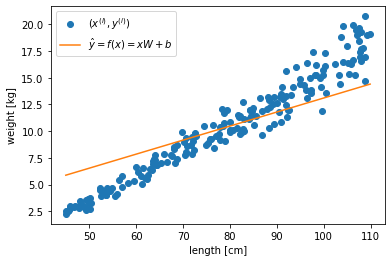

In [11]:
# Import relevant libraries
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import data from file
data = pd.read_csv("length_weight.csv", names=['length', 'weight'])

x_in = data['length'][1:].astype(np.float32).values
y_in = data['weight'][1:].astype(np.float32).values

x_train = torch.tensor(x_in[:800].reshape(-1, 1))
y_train = torch.tensor(y_in[:800].reshape(-1, 1))

x_test = torch.tensor(x_in[800:].reshape(-1, 1))
y_test = torch.tensor(y_in[800:].reshape(-1, 1))

# Create linear regression model
lr = 0.00015
epochs = 300

class LinearRegressionModel:
    def __init__(self):
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    def f(self, x):
        return x @ self.W + self.b

    def loss(self, x, y):
        return torch.nn.functional.mse_loss(self.f(x), y)
    
model = LinearRegressionModel()

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.W, model.b], lr)
for epoch in range(epochs):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

print("Learning rate = %f, epochs = %f" % (lr, epochs))
print("ŷ = xW+b = x%f%f" % (model.W.item(), model.b.item()))
print("loss = %f" % model.loss(x_train, y_train).item())

# Plotting model based on training data
plt.plot(x_test, y_test, 'o', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('length [cm]')
plt.ylabel('weight [kg]')

x = torch.tensor([[torch.min(x_test)], [torch.max(x_test)]])
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')

plt.legend()
plt.show()
